# 辻井 GBDT手習い

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

sns.set()
%matplotlib inline

# ワーニングを無視する
warnings.filterwarnings('ignore')

# 自作ライブラリの読み込み
import importlib
import gbdt_wrap.data_loader as d_load
import gbdt_wrap.gbdt_wrap.xgboost_wrap as xgb_w


In [2]:
# データロード関数定義

def load_data():
  df = sns.load_dataset('tips') 

  # 喫煙者かどうかをバイナリ変換する(0:No 1:Yes)
  df['smoker'] = (df['smoker']
                    .apply(lambda x: 1 if x == 'Yes' else 0)
                    .astype(int))

  return df      

load_data()      

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


In [3]:
# データ定義
target = 'smoker'
categories = ['sex', 'day', 'time']
loader = d_load.DataLoaderBase(target,
                               categories,
                               load_data)

[0]	train-logloss:0.60512	valid-logloss:0.62450
[5]	train-logloss:0.45562	valid-logloss:0.56849
[10]	train-logloss:0.38780	valid-logloss:0.58092
[15]	train-logloss:0.34350	valid-logloss:0.60338
[20]	train-logloss:0.31579	valid-logloss:0.62021
[23]	train-logloss:0.29847	valid-logloss:0.62840
[0]	train-logloss:0.60309	valid-logloss:0.64897
[5]	train-logloss:0.45678	valid-logloss:0.64363
[10]	train-logloss:0.39208	valid-logloss:0.66575
[15]	train-logloss:0.35534	valid-logloss:0.69766
[20]	train-logloss:0.32116	valid-logloss:0.73196
[22]	train-logloss:0.31136	valid-logloss:0.74984
[0]	train-logloss:0.58779	valid-logloss:0.65369
[5]	train-logloss:0.42153	valid-logloss:0.68738
[10]	train-logloss:0.37197	valid-logloss:0.74460
[15]	train-logloss:0.32992	valid-logloss:0.74716
[20]	train-logloss:0.29072	valid-logloss:0.79276
[21]	train-logloss:0.28174	valid-logloss:0.79656
[0]	train-logloss:0.60398	valid-logloss:0.61605
[5]	train-logloss:0.46113	valid-logloss:0.55101
[10]	train-logloss:0.39568	v

<AxesSubplot: xlabel='gain', ylabel='feature'>

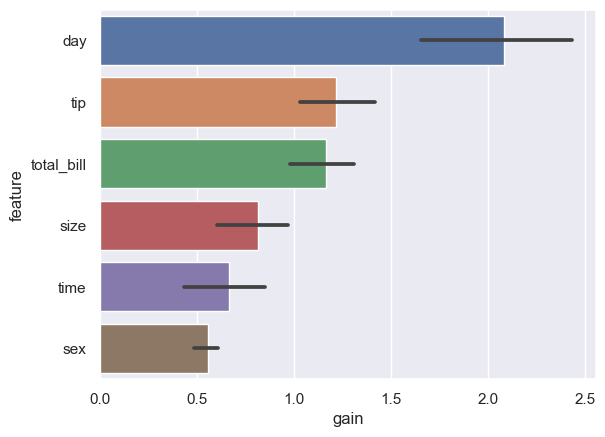

In [8]:
# 学習
model_executor = xgb_w.XGBoostWrap(loader, seed=42)
importance, logloss, preds = model_executor.learn_cv(5)
print(logloss)
print(f'val_log_loss_mean: {logloss: 4f}')
sns.barplot(x='gain', y='feature', data=importance.sort_values('gain', ascending=False))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
Training until validation scores don't improve for 20 rounds
[5]	training's binary_logloss: 0.663164	valid's binary_logloss: 0.65716
[10]	training's binary_logloss: 0.66002	valid's binary_logloss: 0.657003
[15]	training's binary_logloss: 0.657131	valid's binary_logloss: 0.657138
[20]	training's binary_logloss: 0.654394	valid's binary_logloss: 0.65746
[25]	training's binary_logloss: 0.651942	valid's binary_logloss: 0.657636
[30]	training's binary_logloss: 0.649377	valid's binary_logloss: 0.658026
Early stopping, best iteration is:
[10]	training's binary_logloss: 0.66002	valid's binary_logloss: 0.657003
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
Training until validation scores don't improve for 20 rounds
[5]	training's binary_logloss: 0.656132	valid's binary_logloss: 0.670142
[10]	training's binary_logloss: 0.649199	valid's binary_log

<AxesSubplot: xlabel='gain', ylabel='feature'>

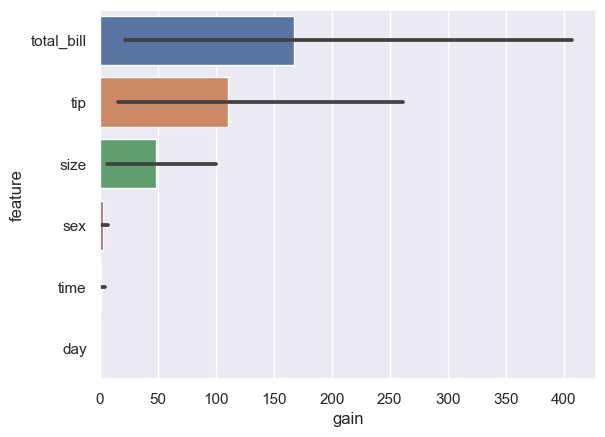

In [9]:
import gbdt_wrap.gbdt_wrap.lightgbm_wrap as lgb_w
# 学習
loader.initialize_data()
model_executor_lgb = lgb_w.LightGBMWrap(loader, seed=42)
importance, logloss, preds = model_executor_lgb.learn_cv(5)
print(logloss)
print(f'val_log_loss_mean: {logloss: 4f}')
print(importance)
sns.barplot(x='gain', y='feature', data=importance.sort_values('gain', ascending=False))